In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [19]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [20]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i, j]] += 1
    return np.array(hist)

In [21]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col * scale), int(row * scale))
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [22]:
img = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\Week7-8\images\cameraman.tif', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(512, 512)


In [23]:
img = ResizeImage(img, 0.5)
print(img.shape)

(256, 256)


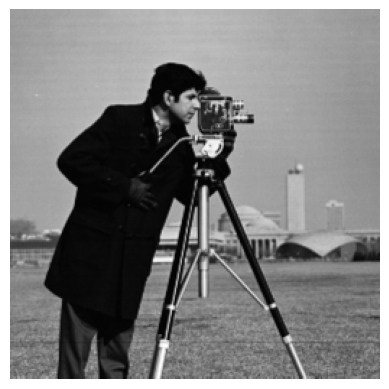

In [24]:
ShowImage(img)

In [25]:
hist = histogram(img)

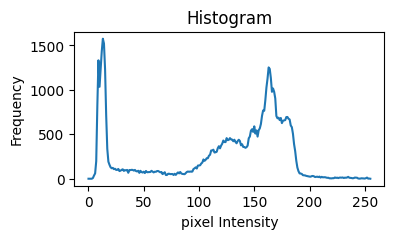

In [26]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel("pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [27]:
thresh = int(np.mean(img))
print(thresh)

118


In [28]:
prob = hist/np.sum(hist)

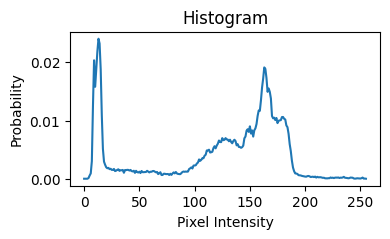

1.0


In [29]:
plt.figure(figsize=(4,2))
plt.plot(prob)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.show()

print(np.sum(prob))

In [30]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001

In [31]:
u0 = np.sum(np.array([i for i in range(thresh)])*prob[:thresh])/w0
u1 = np.sum(np.array([i for i in range(thresh,256)])*prob[thresh:])/w1

In [32]:
if(u0 == 0.0):
    thr = u1
elif (u1 == 0.0):
    thr = u0
else:
    thr = int((u0 + u1)/2)
    print(thresh, thr)

118 101


In [33]:
def intermean(hist, t):
    prob = hist/np.sum(hist)

    w0 = np.sum(prob[:t]) + 0.00000001
    w1 = np.sum(prob[t:]) + 0.00000001

    u0 = np.sum(np.array([i for i in range(t)])*prob[:t])/w0
    u1 = np.sum(np.array([i for i in range(t,256)])*prob[t:])/w1

    if (u0 == 0.0):
        thr = u1
    elif (u1 == 0.0):
        thr = u0
    else:
        thr = (u0 +u1) / 2

    return thr.astype('int6')

In [34]:
T0 = 18
#T0 = int(np.mean(img))
flag = True
Tlist = []
Tlist.append(T0)
while (flag):
    T1 = intermean(hist, T0)
    Tlist.append(T1)
    if (math.fabs(T1 -T0) < 1):
        flag = False
    else:
        T0 = T1
print(Tlist)

TypeError: data type 'int6' not understood

In [35]:
T = Tlist(-1)
print(T)

TypeError: 'list' object is not callable

In [36]:
out = np.zeros_like(img)
thresh = T
out[img >= thresh] = 255
out = out.astype(np.uint8)
ShowImage(out)

NameError: name 'T' is not defined

In [37]:
ret, bimg_2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)